<a href="https://colab.research.google.com/github/EvenSol/NeqSim-Colab/blob/master/notebooks/excercise/calculationofphaseenvelopes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%%capture
!pip install neqsim==2.5.35
import neqsim
from neqsim.thermo.thermoTools import *
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline

Natural Gas Fluid:

   ComponentName  MolarComposition[-]
0       nitrogen             1.179900
1            CO2             0.510200
2        methane            95.330300
3         ethane             2.110200
4        propane             0.321700
5       i-butane             0.127800
6       n-butane             0.084600
7      i-pentane             0.069400
8      n-pentane             0.034000
9         2-m-C5             0.033500
10        3-m-C5             0.010900
11      n-hexane             0.018100
12       benzene             0.001700
13      c-hexane             0.006610
14     n-heptane             0.002070
15       toluene             0.004500
16          c-C7             0.005300
17      n-octane             0.006100
18      m-Xylene             0.003300
19          c-C8             0.000103
20      n-nonane             0.000320
21          nC10             0.000400
                          total         gas                       
           nitrogen  1.18154E-2  1.1815

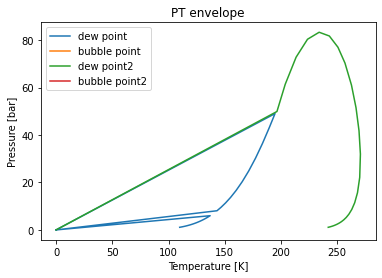

cricoP  83.3163022035517   [bara]   cricoT  233.96012927328314  °C
                          total         gas          oil                     
           nitrogen  1.18154E-2  1.18165E-2   3.70138E-4      [mole fraction]
                CO2   5.1091E-3   5.1093E-3   3.03781E-3      [mole fraction]
            methane   9.5463E-1  9.54712E-1   1.10392E-1      [mole fraction]
             ethane  2.11314E-2  2.11314E-2   2.11119E-2      [mole fraction]
            propane  3.22148E-3  3.22043E-3   1.40749E-2      [mole fraction]
           i-butane  1.27978E-3  1.27844E-3    1.5054E-2      [mole fraction]
           n-butane  8.47178E-4  8.45705E-4   1.60414E-2      [mole fraction]
          i-pentane  6.94966E-4  6.91439E-4   3.70978E-2      [mole fraction]
          n-pentane  3.40473E-4  3.37989E-4   2.59756E-2      [mole fraction]
             2-m-C5  3.35466E-4  3.29281E-4   6.41738E-2      [mole fraction]
             3-m-C5  1.09152E-4  1.06792E-4   2.44588E-2      [mole fractio

In [2]:
from neqsim.thermo import fluid_df, TPflash, phaseenvelope,printFrame,dewt
import pandas as pd


naturalgas = {'ComponentName':  ["nitrogen", "CO2", "methane", "ethane", "propane", "i-butane", "n-butane","i-pentane", "n-pentane","2-m-C5", "3-m-C5", "n-hexane", "benzene", "c-hexane", "n-heptane", "toluene", "c-C7", "n-octane", "m-Xylene", "c-C8", "n-nonane", "nC10"], 
       'MolarComposition[-]':  [1.1799,0.5102,95.3303,2.1102,0.3217,0.1278,0.0846,0.0694,0.0340,0.0335,0.0109,0.0181,0.0017,0.00661,0.00207,0.0045,0.00530,0.0061,0.0033,0.000103,0.00032,0.0004]
} 


naturalgasdf = pd.DataFrame(naturalgas) 
print("Natural Gas Fluid:\n")
print(naturalgasdf.head(30).to_string())

naturalgasFluid = fluid_df(naturalgasdf)#.setModel("UMR-PRU-EoS")
naturalgasFluid.autoSelectMixingRule()
TPflash(naturalgasFluid)
printFrame(naturalgasFluid)

gasPhaseEnvelope = phaseenvelope(naturalgasFluid,True)
cricobar = gasPhaseEnvelope.get("cricondenbar")
print("cricoP ",  cricobar[1], "  [bara] ", " cricoT ", cricobar[0], " °C")



naturalgasFluid.setTemperature(-10.0, "C")
naturalgasFluid.setPressure(21.0, "bara")
TPflash(naturalgasFluid)
printFrame(naturalgasFluid)


naturalgasFluid.setPressure(21.0, "bara")
dewPointT =dewt(naturalgasFluid)-273.15
print("dew point T ", dewPointT, " °C")

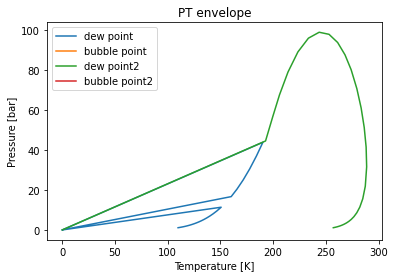

cricoP  98.91668850030412   [bara]   cricoT  243.7025511923998  °C


In [3]:
#Method to change fluid composition
fluidComposition(naturalgasFluid, [1.1799,0.5102,92.3303,2.1102,0.3217,0.1278,0.0846,0.0694,0.340,0.0335,0.109,0.0181,0.0017,0.00661,0.00207,0.0045,0.00530,0.0061,0.0033,0.000103,0.00032,0.004])

gasPhaseEnvelope = phaseenvelope(naturalgasFluid,True)
cricobar = gasPhaseEnvelope.get("cricondenbar")
print("cricoP ",  cricobar[1], "  [bara] ", " cricoT ", cricobar[0], " °C")

Natural Gas Fluid:

   ComponentName  MolarComposition[-]
0       nitrogen             1.193650
1            CO2             1.181640
2        methane            83.802429
3         ethane             7.524265
4        propane             3.823774
5       i-butane             0.527226
6       n-butane             1.045926
7      22-dim-C3             0.003427
8      i-pentane             0.237201
9      n-pentane             0.269206
10          c-C5             0.016500
11     22-dim-C4             0.003981
12     23-dim-C4             0.006793
13        2-m-C5             0.052717
14        3-m-C5             0.026874
15      n-hexane             0.076107
16      c-hexane             0.071310
17       benzene             0.018542
18     n-heptane             0.049300
19       toluene             0.011154
20          c-C7             0.034016
21      n-octane             0.011852
22      m-Xylene             0.003668
23          c-C8             0.004812
24      n-nonane             0

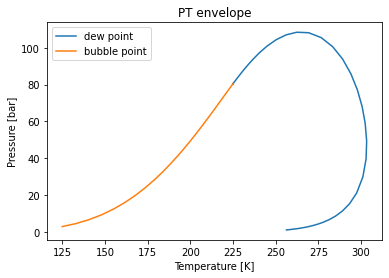

cricoP  108.44975730629042   [bara]   cricoT  262.31952734873397  °C
                          total         gas         oil                     
           nitrogen  1.19365E-2  1.20845E-2  4.50218E-4      [mole fraction]
                CO2  1.18164E-2  1.18958E-2  5.65403E-3      [mole fraction]
            methane  8.38024E-1  8.47315E-1  1.17048E-1      [mole fraction]
             ethane  7.52426E-2  7.52114E-2   7.7669E-2      [mole fraction]
            propane  3.82377E-2   3.6664E-2  1.60359E-1      [mole fraction]
           i-butane  5.27226E-3   4.6361E-3  5.46376E-2      [mole fraction]
           n-butane  1.04593E-2   8.5728E-3  1.56847E-1      [mole fraction]
          22-dim-C3    3.427E-5  2.64064E-5  6.44478E-4      [mole fraction]
          i-pentane  2.37201E-3  1.44971E-3  7.39417E-2      [mole fraction]
          n-pentane  2.69206E-3  1.41775E-3  1.01578E-1      [mole fraction]
               c-C5     1.65E-4  6.92501E-5  7.59512E-3      [mole fraction]
       

In [4]:
from neqsim.thermo import fluid_df, TPflash, phaseenvelope,printFrame,dewt
import pandas as pd


naturalgas = {'ComponentName':  ["nitrogen", "CO2", "methane", "ethane", "propane", "i-butane", "n-butane", "22-dim-C3", "i-pentane", "n-pentane","c-C5","22-dim-C4","23-dim-C4","2-m-C5", "3-m-C5", "n-hexane", "c-hexane","benzene", "n-heptane", "toluene", "c-C7", "n-octane", "m-Xylene", "c-C8", "n-nonane", "nC10"], 
       'MolarComposition[-]':  [1.193650, 1.181640, 83.802429,7.524265,3.823774,0.527226,1.045926,0.003427,0.237201,0.269206,0.016500,0.003981,0.006793,0.052717,0.026874,0.076107,0.071310,0.018542,0.049300,0.011154,0.034016,0.011852,0.003668,0.004812,0.003253,0.000380]
} 


naturalgasdf = pd.DataFrame(naturalgas) 
print("Natural Gas Fluid:\n")
print(naturalgasdf.head(30).to_string())

naturalgasFluid = fluid_df(naturalgasdf)#.setModel("UMR-PRU-EoS")
naturalgasFluid.autoSelectMixingRule()
TPflash(naturalgasFluid)
printFrame(naturalgasFluid)

gasPhaseEnvelope = phaseenvelope(naturalgasFluid,True)
cricobar = gasPhaseEnvelope.get("cricondenbar")
print("cricoP ",  cricobar[1], "  [bara] ", " cricoT ", cricobar[0], " °C")



naturalgasFluid.setTemperature(-10.0, "C")
naturalgasFluid.setPressure(21.0, "bara")
TPflash(naturalgasFluid)
printFrame(naturalgasFluid)


naturalgasFluid.setPressure(21.0, "bara")
dewPointT =dewt(naturalgasFluid)-273.15
print("dew point T ", dewPointT, " °C")

In [5]:
naturalgasFluid.setPressure(61.0, "bara")
dewPointT =dewt(naturalgasFluid)-273.15
print("dew point T ", dewPointT, " °C")

dew point T  28.958026178848343  °C
